# Data Driven Approach - ARIMA Model
ARIMA model was good only on stationary dataset. It can not perform good on non-stationary dataset. For that we have 'd' parameter in ARIMA model which transforms non-stationary data to stationary data. Order is (p,d,q)

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller # adfuller checks if data is stationary or non-stationary
from pmdarima import auto_arima # from auto_arima we will get order of p,d,q
from statsmodels.tsa.arima.model import ARIMA # ARIMA function for model building
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('DailyTemps.csv',index_col='DATE',parse_dates=True)#parse_dates=True tells python that index column is date time column
df
# Here we are converting DATE column as index for visualization purpose 
# we want to predict avg temp for next few days or months. So we are only going to work with AvgTemp column


In [ ]:
df.dropna(inplace=True)

**Check if Data is stationary or not**
How to check? - Plot the Data

We can directly conclude that 
if No Trend - data is Stationary


<Axes: xlabel='DATE'>

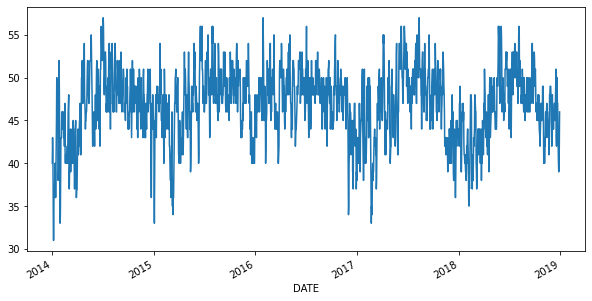

In [ ]:
df['AvgTemp'].plot(figsize=(10,5))

Here No Trend is present so data is Stationary. Here if mean is computed it will come around 46 to 47. 

Majority of data points are around 45 to 50. There should not be huge difference between mean of 2014 and mean of 2015. 

It will not same every year but it should be near to each other. Then we can call it as a Stationary data.

But we can't completely rely on visualizations only.
So to make sure that data is Non-Stationary we will use adfuller test.

In [ ]:
def ad_test(dataset):
  dftest = adfuller(dataset,autolag='AIC') 
  #AIC is the number which will help me to tell whether model is performing good or not. (Not much imp. here. We will see it in ARIMA)
  print("P-Value: ", dftest[1])# dftest[1]: index of p-value is 1.

ad_test(df['AvgTemp'])#Function call

#adfuller() test gives you different values like p-value, t-value, alpha. But we want only p-value.
# based on that we will decide whether data is stationary or non-stationary
# If p<0.05 then Data is Stationary
# If p>0.05 then Data is Non-Stationary

P-Value:  8.675937480199653e-09


Here p-value is approximately = 0. Here p<0.05. So Data is Stationary.

So we can start with model building.

# **ARIMA Model Building**

ARIMA is composed of 3 terms: (AutoRegression (p) + Integraded (d) + Moving Avg (q))

First we need to find out the order of ARIMA model.

In [ ]:
stepwise_fit = auto_arima(df['AvgTemp'],trace=True,suppress_warnings=True)
# auto_arima() function returns all these values p,d,q
# trace=True gives all possible combinations that auto_arima()function is going to take
# ignore warnings.
# Function takes combination of p,d,q values, whichever combinations gives minimum AIC value
# Akaike’s Information Criterion (AIC), which was useful in selecting predictors for regression, 
# is also useful for determining the order of an ARIMA model. 
# AIC is kind of error metric for ARIMA model. Lesser AIC - Better the model.

Best Model: p:1, d:0, q:5 Min AIC: 895.034

Why d=0? Data is already Stationary so no need to do differencing.

In [ ]:
# Create ARIMA model
# Split the data
train = df.iloc[:-30]
test = df.iloc[-30:] # last 30 records for testing purpose
print(train.shape,test.shape)

(1791, 5) (30, 5)


In [ ]:
model = ARIMA(train['AvgTemp'],order=(1,0,5)) # goal is predict avg. temp.
model = model.fit()
#model.summary()

# **Evaluating the Model**

In [ ]:
test

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-01,36.0,52.0,44.0,640,1743
2018-12-02,33.0,51.0,42.0,641,1743
2018-12-03,36.0,53.0,45.0,641,1743
2018-12-04,39.0,56.0,48.0,642,1743
2018-12-05,36.0,53.0,45.0,643,1743
2018-12-06,36.0,52.0,44.0,643,1743
2018-12-07,37.0,53.0,45.0,644,1744
2018-12-08,34.0,53.0,44.0,645,1744
2018-12-09,36.0,53.0,45.0,645,1744


In [ ]:
index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
# as sequential data we need to give date range to make index for test data

pred = model.predict(start = 1791, end = 1820) # test data is starting from index 1791 to 1820.(last 30 records)

#pred.index = index_future_dates

In [ ]:
pred.index

DatetimeIndex(['2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08',
               '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12',
               '2018-12-13', '2018-12-14', '2018-12-15', '2018-12-16',
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
from math import sqrt
test['AvgTemp'].mean()
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse) # very less error - near to 0. So ARIMA model is good

3.000463825206671


In [ ]:
pred

2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721545
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933418
2018-12-13    45.942808
2018-12-14    45.952063
2018-12-15    45.961185
2018-12-16    45.970175
2018-12-17    45.979036
2018-12-18    45.987769
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021463
2018-12-23    46.029586
2018-12-24    46.037591
2018-12-25    46.045481
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075922
2018-12-30    46.083261
Freq: D, Name: predicted_mean, dtype: float64